X_train.shape: (75, 2)
X_test.shape: (25, 2)


By decision function
Test dataset Decision function result: (shape = (25,))
[-5.29690854 -2.24951873  3.58182916 -5.40781201 -3.02363581  3.73735881
 -2.22969909  3.93017864  1.49053389  1.09075558  3.73735881 -3.4234749
 -3.47749682 -3.02363581  3.82418229 -0.73723962 -3.02363581 -2.39370842
  5.30902567 -2.40899785  3.22248323 -3.02363581 -1.6529522   1.88471921
 -3.37906885]
Decision: 
[0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0]
Predictions by decision:
['blue' 'blue' 'red' 'blue' 'blue' 'red' 'blue' 'red' 'red' 'red' 'red'
 'blue' 'blue' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'blue' 'red' 'blue'
 'blue' 'red' 'blue']
Prediction by function:
['blue' 'blue' 'red' 'blue' 'blue' 'red' 'blue' 'red' 'red' 'red' 'red'
 'blue' 'blue' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'blue' 'red' 'blue'
 'blue' 'red' 'blue']

By prediction probabilities
Test dataset prediction probabilities: (shape = (25, 2))
[[0.9950179  0.0049821 ]
 [0.9046090

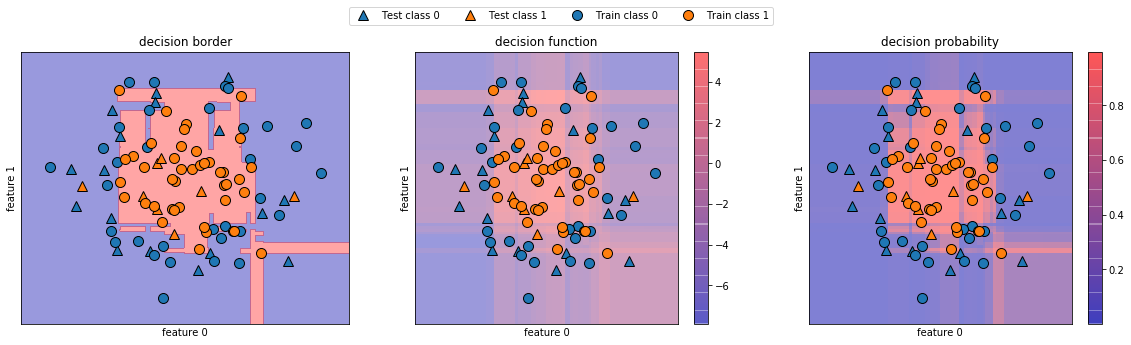



===== END =====


In [1]:
%matplotlib inline
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

X, y = make_circles(noise=0.25, factor=0.5, random_state=42)

y_named = np.array(['blue', 'red'])[y]

X_train, X_test, y_train, y_test, y_train_named, y_test_named = \
        train_test_split(X, y, y_named, random_state=42)
print('X_train.shape: {}'.format(X_train.shape))
print('X_test.shape: {}\n'.format(X_test.shape))

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train_named)

# prediction decision function of the model
print('\nBy decision function')
test_decision = gbc.decision_function(X_test)
print('Test dataset Decision function result: (shape = {})\n{}'.format(test_decision.shape, test_decision))

pred_classindex = (test_decision>0).astype(int)
print('Decision: \n{}'.format(pred_classindex))

prediction = gbc.classes_[pred_classindex]
print('Predictions by decision:\n{}'.format(prediction))

print('Prediction by function:\n{}'.format(gbc.predict(X_test)))

# prediction probability of the model
print('\nBy prediction probabilities')
test_proba = gbc.predict_proba(X_test)
print('Test dataset prediction probabilities: (shape = {})\n{}'.format(test_proba.shape, test_proba))


fig, axes = plt.subplots(1, 3, figsize=(20,5))
mglearn.tools.plot_2d_separator(gbc, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
decision_image = mglearn.tools.plot_2d_scores(gbc, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)
proba_image = mglearn.tools.plot_2d_scores(gbc, X, ax=axes[2], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

cbar = plt.colorbar(decision_image, ax=axes[1])
cbar = plt.colorbar(proba_image, ax=axes[2])
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 'Train class 1'], ncol=4, loc=(1.,1.1))

axes[0].set_title('decision border')
axes[1].set_title('decision function')
axes[2].set_title('decision probability')

plt.show()
print('\n\n===== END =====')


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbc = GradientBoostingClassifier(random_state=42, learning_rate=0.01)
gbc.fit(X_train, y_train)

# by decision function
print('\nBy decision function')
decision = gbc.decision_function(X_test)
print('Decision function: (shape={})\n{}'.format(decision.shape, decision))
decision_result_indices = np.argmax(decision, axis=1)    # np.argmax
print('Decision result indices:\n{}'.format(decision_result_indices))

# by prediction probability
print('\nBy prediction probability')
proba = gbc.predict_proba(X_test)
print('Prediction probability: (shape={})\n{}'.format(proba.shape, proba))
proba_result_indices = np.argmax(proba, axis=1)
print('Prediction probability result indices:\n{}'.format(proba_result_indices))

print('\nresult is same?\n{}'.format(proba_result_indices==decision_result_indices))



By decision function
Decision function: (shape=(38, 3))
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52397561 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53043817 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53043817 -0.4676268   1.50129926]
 [ 1.51154215 -0.49561142 -0.50310736]
 [ 1.51154215 -0.49561142 -0.50310736]
 [ 1.51154215 -0.49561142 -0.50310736]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52419721 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52419721 -0.4676268   1.51953786]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.53107259 -0.45541112  1.46576456]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52419721 -0.4676268   1.51953786]
 [-0.52